### Exercise 1 (8 Points): Cross-Validation

#### Implement your own code (= do not use the sklearn CV-library) for doing cross-validation with k=4 (number of folds) on the training data:

##### - Use the area-under-the-roc-curve as selection metric.
##### - Use RandomForest as classification model.
##### - Investigate 5 different settings by varying the following hyperparameters: n_estimators and max_depth. (It's up to you, which 5 settings you want to try out).
##### - Use the best hyperparameters that you find during CV to train a model and predict on the test data.
##### - Plot the ROC-curve for this model and compare it to a default RandomForest (with default hyperparameters).

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
transactions = pd.read_csv('data/data.csv')
transactions.drop(['Unnamed: 0'], axis=1, inplace=True)
transactions = transactions[['totalAmount','c_0','c_1','c_2','c_3','c_4','c_5', 'returnLabel']]

X = transactions.drop('returnLabel',axis=1)
y = transactions.returnLabel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


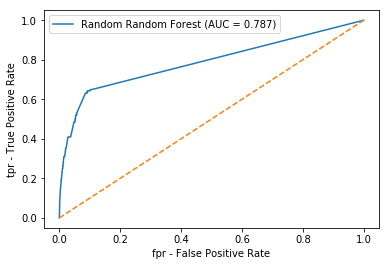

In [3]:
for_model = RandomForestClassifier()
for_model.fit(X_train, y_train)
for_probs = for_model.predict_proba(X_test)[:, 1]

# calculate AUC
for_auc = roc_auc_score(y_test, for_probs)
# calculate roc curve
for_fpr, for_tpr, thresholds = roc_curve(y_test, for_probs)

# plot the roc curve for the model
plt.plot(for_fpr, for_tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.legend(['Random Random Forest (AUC = '+str(round(for_auc,3))+')'], loc='best')
# naming the axes 
plt.xlabel('fpr - False Positive Rate') 
plt.ylabel('tpr - True Positive Rate') 

# show the plot
plt.show()

In [4]:
count_folds = 4
kf = KFold(n_splits = count_folds, shuffle = True)

rocs = []
scores = []
my_n_estimators = [5,20,50,70,90] 
my_max_depths = [2,4,7,10,12]
    
for i in range(len(my_n_estimators)):
  my_n_estimator = my_n_estimators[i]
  my_max_depth = my_max_depths[i]
    
  for j in range(count_folds):
    result = next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]

    kf_model = RandomForestClassifier(n_estimators=my_n_estimator, max_depth=my_max_depth)
    kf_model.fit(X_train, y_train)
    probas = kf_model.predict_proba(X_test)[::,1]
    rocs.append([roc_auc_score(y_test, probas)])
 
  scores.append([np.mean(rocs),my_n_estimator, my_max_depth])

In [5]:
scores = np.asarray(scores)
best_score_index = np.argmax(scores[:,0])

In [6]:
print(f"Best results (AUC = {scores[best_score_index][0]}) with n_estimators={scores[best_score_index][1]}, max_depth={scores[best_score_index][2]}")

Best results (AUC = 0.9105140735266417) with n_estimators=90.0, max_depth=12.0


In [7]:
best_n_estimators = int(scores[best_score_index][1])
best_max_depth = int(scores[best_score_index][2])

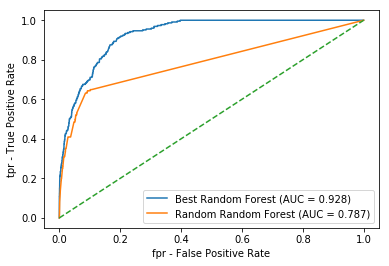

In [8]:
best_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
best_model.fit(X_train, y_train)
best_probs = best_model.predict_proba(X_test)[:, 1]

# calculate AUC
best_auc = roc_auc_score(y_test, best_probs)
# calculate roc curve
best_fpr, best_tpr, thresholds = roc_curve(y_test, best_probs)

# plot the roc curve for the model
plt.plot(best_fpr, best_tpr,for_fpr, for_tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.legend(['Best Random Forest (AUC = '+str(round(best_auc,3))+')','Random Random Forest (AUC = '+str(round(for_auc,3))+')'], loc='best')
# naming the axes 
plt.xlabel('fpr - False Positive Rate') 
plt.ylabel('tpr - True Positive Rate') 

# show the plot
plt.show()